# Data Science Worksheet

In [1]:
%matplotlib inline


## 1. Ask our question

Which aspects of Python programming most commonly confuses programmers?

## 2. Get the data

Stack Overflow has a lot of relevant data.  For the purposes of today's exercise, let's pretend
that Stack Overflow does not an API.

So which publicly accessible pages hold that data?

In [2]:
SO_URL = "https://stackoverflow.com/questions/tagged/{}?page={}&sort=frequent&pagesize=50"
# print(SO_URL.format("python", 1))

So we want the HTML from `SO_URL`, which is available via the HTTP
protocol that a browser users.  How do we send that request in Python?

### the `requests` library

In [3]:
import requests

SO_response = requests.get(SO_URL.format('python', 1))

if SO_response.status_code == 200:
    SO_page_html = SO_response.text

# print(SO_page_html)

### Data wrangling

So now we have our raw (primary) data.  It needs to be cleaned and structured.



In [4]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(SO_page_html, "html.parser")

question_summaries = soup.find_all("div", class_='question-summary')

# print(len(question_summaries))
# print(question_summaries[0])

Drill down further.

In [5]:
dataset = []

for summary in question_summaries:
#     print(type(summary))
    question = summary.find('a', class_='question-hyperlink').text
    views = int(summary.find('div', class_='views')['title'].split(" ")[0].replace(",", ""))
    vq = (views, question)
    
    dataset.append(vq)

print(dataset)

[(103281, '“Least Astonishment” and the Mutable Default Argument'), (86265, 'How do I test multiple variables against a value?'), (991735, "Understanding Python's slice notation"), (202942, 'Asking the user for input until they give a valid response'), (15122, 'List of lists changes reflected across sublists unexpectedly'), (855805, 'How to clone or copy a list?'), (74825, 'How do I create a variable number of variables?'), (534650, 'How do you split a list into evenly sized chunks?'), (857157, 'How do I pass a variable by reference?'), (280931, 'Remove items from a list while iterating'), (945848, 'Making a flat list out of list of lists in Python'), (5237, 'How to make good reproducible pandas examples'), (404865, 'How can I read inputs as integers?'), (1557727, 'What does the “yield” keyword do?'), (193059, 'Short Description of the Scoping Rules?'), (341437, 'What does ** (double star/asterisk) and * (star/asterisk) do for parameters?'), (2275254, 'Calling an external command in Py

In [6]:
dataset2 = []
for vq in dataset:
    views, question = vq
    words = question.split(" ")
    for word in words: 
        dataset2.append((views, word))

# dataset

# print(dataset2)

## 3. Explore the data.

In [7]:
import pandas as pd
import pandas_profiling

df = pd.DataFrame(dataset2, columns=("votes", "word"))

df # You don't need to print df. -RH

/home/rob/anaconda3/envs/ds-pytn/lib/python3.6/site-packages/pandas_profiling/base.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/rob/anaconda3/envs/ds-pytn/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/rob/anaconda3/envs/ds-pytn/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/rob/anaconda3/envs/ds-pytn/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/rob/anaconda3/envs/ds-pytn/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/rob/anaconda3/envs/ds-pytn/lib/pytho

,votes,word
0,103281,“Least
1,103281,Astonishment”
2,103281,and
3,103281,the
4,103281,Mutable
5,103281,Default
6,103281,Argument
7,86265,How
8,86265,do
9,86265,I


In [9]:
for x, i in df.iterrows():
    if "==" in i['word']:
        print(x, i['votes'], i['word']) 

# df2_by_word = df.groupby(by='word').mean()

# df['votes']  = df['votes'].astype(float)

# print(df.dtypes)

df2 = df.groupby('word', as_index=False).sum().sort_values('votes', ascending = False) 
#Added a sort method so you see what the top values are -RH
df2.head(20)
#You can see below you need to split "?" off -RH
#Also gives you a quick way to drop articles - RH 

138 1466371 ==
255 9062 ==
325 1076666 '=='


,word,votes
57,a,13485917
129,in,11614475
28,How,10154605
35,Python,7020721
222,to,6297797
217,the,6174834
101,do,5971615
29,I,5554746
49,What,4827183
103,does,4451263


In [10]:
pandas_profiling.ProfileReport(df)

##Look at that shit. So much "a", "How", "in" etc...

Number of variables,2
Number of observations,420
Total Missing (%),0.0%
Total size in memory,6.6 KiB
Average record size in memory,16.2 B
Numeric,1
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,50


In [11]:
# Start your booleans -RH

df2 = df2.drop(df2[(df2.word == 'a') | (df2.word == 'in') | (df2.word == 'to') # You can iterate through a list of articles here to further refine
          ].index).sort_values('votes', ascending = False)
df2.head(20)

#Something is starting to emerge.... "Global variabes" perhaps? -RH

,word,votes
28,How,10154605
35,Python,7020721
217,the,6174834
101,do,5971615
29,I,5554746
49,What,4827183
103,does,4451263
162,of,3702065
146,list,3436006
231,variables,3296339


In [12]:
word_frequencies = {x:y for x, y in df2.values}

In [13]:
print(word_frequencies)

{'How': 10154605, 'Python': 7020721, 'the': 6174834, 'do': 5971615, 'I': 5554746, 'What': 4827183, 'does': 4451263, 'of': 3702065, 'list': 3436006, 'variables': 3296339, 'do?': 3024098, 'function': 2797978, 'an': 2521581, 'by': 2422933, 'global': 2386067, 'that': 2386067, 'than': 2386067, 'Using': 2386067, 'created': 2386067, 'one': 2386067, 'other': 2386067, 'them': 2386067, 'Calling': 2275254, 'command': 2275254, 'external': 2275254, 'on': 2257095, 'install': 2084905, 'pip': 2084905, 'Windows?': 2084905, 'into': 2010956, 'or': 1950595, 'value?': 1652041, 'dictionary': 1565776, 'sort': 1565776, 'keyword': 1557727, '“yield”': 1557727, 'Converting': 1476306, 'string': 1476306, 'datetime': 1476306, '==': 1475433, '__name__': 1466371, 'if': 1466371, '“__main__”:': 1466371, 'lists': 1362186, 'two': 1310815, 'is': 1297857, 'you': 1286327, 'can': 1210895, 'conditional': 1171170, 'operator?': 1171170, 'Does': 1171170, 'have': 1171170, 'ternary': 1171170, 'Why': 1126972, 'and': 1111882, 'using

Now let's think more about the data via visualization:

(-0.5, 399.5, 199.5, -0.5)

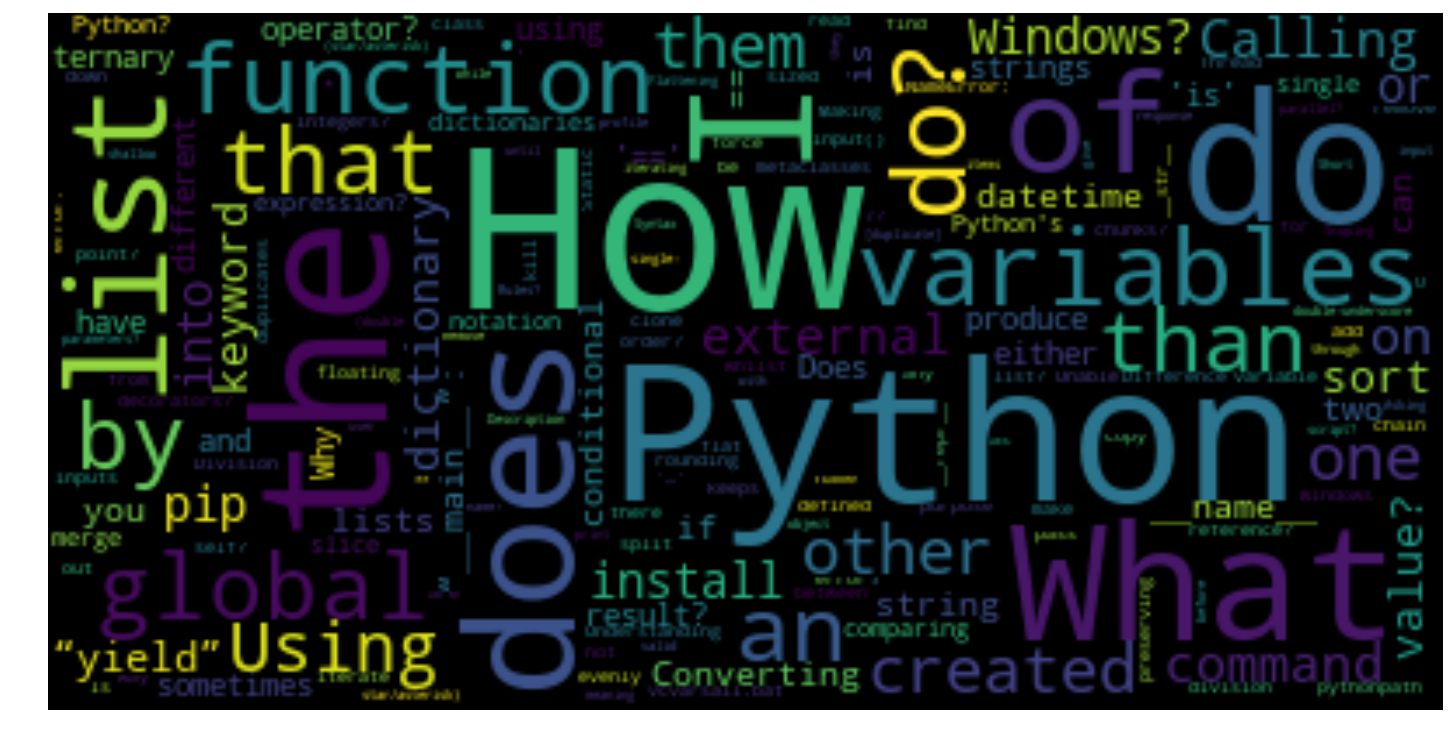

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

plt.figure(figsize=(18, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## 4. Model the data (optional)

## 5. Communicate the data.